# Titanic 旅客生存資料分析
   -數據：http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.txt

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 資料讀取

In [3]:
titanic = pd.read_excel('titanic3.xls')

In [3]:
titanic.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


## 欄位名稱
    -Pclass => 乘客等級(1/2/3等艙位)
    -Survived => 是否存活(0:死亡/1:存活)
    -Name => 乘客姓名
    -Sex => 性別
    -Age => 年齡
    -SibSp => 堂兄弟/妹個數
    -Parch => 父母與小孩個數
    -Ticket => 船票信息
    -Fare => 票價
    -Cabin => 客艙
    -Embarked => 登船港口(C = Cherbourg, Q = Queenstown, S = Southampton)
    -Boat => 救生艇
    -Body => 遺體識別編號
    -Home.desst => 家鄉/目的地

## 資料觀察及清洗

In [4]:
#資料總數及欄位資訊
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [5]:
#有缺值的欄位及缺值數量
titanic.isnull().sum().sort_values(ascending=False)

body         1188
cabin        1014
boat          823
home.dest     564
age           263
embarked        2
fare            1
ticket          0
parch           0
sibsp           0
sex             0
name            0
survived        0
pclass          0
dtype: int64

## 補空值
- 有搭上救生艇的的人大都為獲救的人(有少部分例外)，故將boat的資料填補方式改為[1:有救生艇,0:無救生艇]

In [6]:
#轉換boat資料
titanic.loc[(titanic.boat.notnull()),'boat']=1
titanic.loc[(titanic.boat.isnull()),'boat']=0

In [7]:
#1309筆資料中有32筆資料不符合上述假設
a=0
for i in range(0,1309):
    if(titanic['boat'][i] != titanic['survived'][i]):
        a+=1
print(a)

32


- 有客艙的人有較大的機率獲救，但因為關係沒有boat來的強烈，故後續分析會捨棄cabin這個欄位

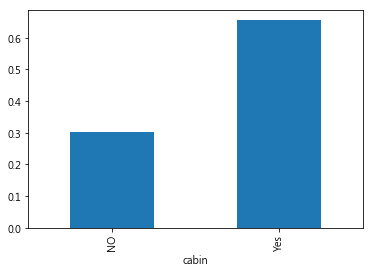

In [8]:
#有無客艙嶼獲救機率
titanic.loc[(titanic.cabin.notnull()),'cabin']="Yes"
titanic.loc[(titanic.cabin.isnull()),'cabin']="NO"
plt.show(titanic.groupby(['cabin'])['survived'].mean().plot(kind='bar'))

In [9]:
#移除cabin欄位
titanic = titanic.drop(['cabin'],axis=1)

- 票價有1缺失值，考慮用船艙等級(pclass)的平均票價來補

In [10]:
#確認缺失值的船艙等級，發現為3
titanic['pclass'][titanic['fare'].isnull()]

1225    3
Name: pclass, dtype: int64

In [11]:
#找出等級3的船艙的平均票價
titanic['fare'][titanic.pclass.values==3].mean()

13.302888700564957

In [12]:
#依照平均票價補植
titanic['fare'].fillna(titanic['fare'][titanic.pclass.values==3].mean(),inplace=True)

- embarked 缺值有兩個，考慮用眾數填補

In [13]:
#查看眾數為 S 914
titanic['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [14]:
#填補缺值為 S
titanic['embarked'].fillna('S',inplace=True)

- body欄位觀察之後，發現除了獲救者與有識別出的遺體外尚有688名乘客狀況不明，另該欄位較無分析價值，故在後續分析也與捨棄

In [15]:
#有body編號的視為死亡(0)沒有的視為存活(1)
titanic.loc[(titanic.body.notnull()),'body']=0
titanic.loc[(titanic.body.isnull()),'body']=1

In [16]:
#688名乘客狀況不明
a=0
for i in range(0,1309):
    if(titanic['body'][i] != titanic['survived'][i]):
        a+=1
print(a)

688


In [17]:
#移除body欄位
titanic = titanic.drop(['body'],axis=1)

- 以年齡平均數補年齡缺值(應該有其他更好的方法)

In [18]:
titanic['age'].fillna((titanic['age'].mean()),inplace=True)

- home.dest欄位較無分析價值，且缺值較多，故予以捨棄

In [19]:
#移除home.dest欄位
titanic = titanic.drop(['home.dest'],axis=1)

In [20]:
#缺值全數補齊
titanic.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
boat        0
dtype: int64

- 資料合併(sibsp及parch合併為family)

In [21]:
titanic['family']=titanic['parch']+titanic['sibsp']
titanic = titanic.drop(['parch','sibsp'],axis=1)

In [22]:
titanic.to_csv('titanic.csv')

## 敘述性統計
- Survived的平均值為0.3819，即大約有38%的乘客獲救；Age的平均值為29.88歲

In [23]:
titanic.describe()

,pclass,survived,age,fare,family
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.881135,33.280206,0.883881
std,0.837836,0.486055,12.883199,51.741830,1.583639
min,1.000000,0.000000,0.166700,0.000000,0.000000
25%,2.000000,0.000000,22.000000,7.895800,0.000000
50%,3.000000,0.000000,29.881135,14.454200,0.000000
75%,3.000000,1.000000,35.000000,31.275000,1.000000
max,3.000000,1.000000,80.000000,512.329200,10.000000


In [24]:
#設定一個畫布，尺寸為18X10
fig = plt.figure(figsize=(18,10))

#統計生還者與遇難者的比例
#用pandas的value_count（）函數就可以統計處suvived取不同值的總數
plt.subplot(2,3,1) # 在一張大圖裡，（2，3）表示圖像分佈為2行3列，（0，0）指的是第一行第一列
titanic.survived.value_counts().plot(kind='bar')#bar表示的畫條形圖
plt.title("獲救情況") # puts a title on our graph
plt.ylabel("人數")

In [25]:
#同理統計一下乘客等級分佈的情況
plt.subplot(2,3,2) #畫第二幅圖
titanic.pclass.value_counts().plot(kind="bar")
plt.ylabel("人數")
plt.title("乘客等級分佈")

In [26]:
#統計獲取者和遇難者的年齡分佈
plt.subplot(2,3,3)
plt.scatter(titanic.survived, titanic.age)
plt.ylabel("年齡") # sets the y axis lable
plt.grid(b=True, which='major', axis='y') # formats the grid line style of our graphs
plt.title("按年齡看獲救分佈 (1為獲救)")

In [27]:
plt.subplot(2,3,4)
titanic.age[titanic.pclass == 1].plot(kind='kde') #從年齡表中抽出乘客等級為1的名單，作出密度曲線
titanic.age[titanic.pclass == 2].plot(kind='kde')
titanic.age[titanic.pclass == 3].plot(kind='kde')
plt.xlabel("年齡")# plots an axis lable #橫軸標籤設為年齡
plt.ylabel("密度") #縱軸標籤設為密度
plt.title("各等級的乘客年齡分佈")
plt.legend(('1等艙', '2等艙','3等艙'),loc='best')

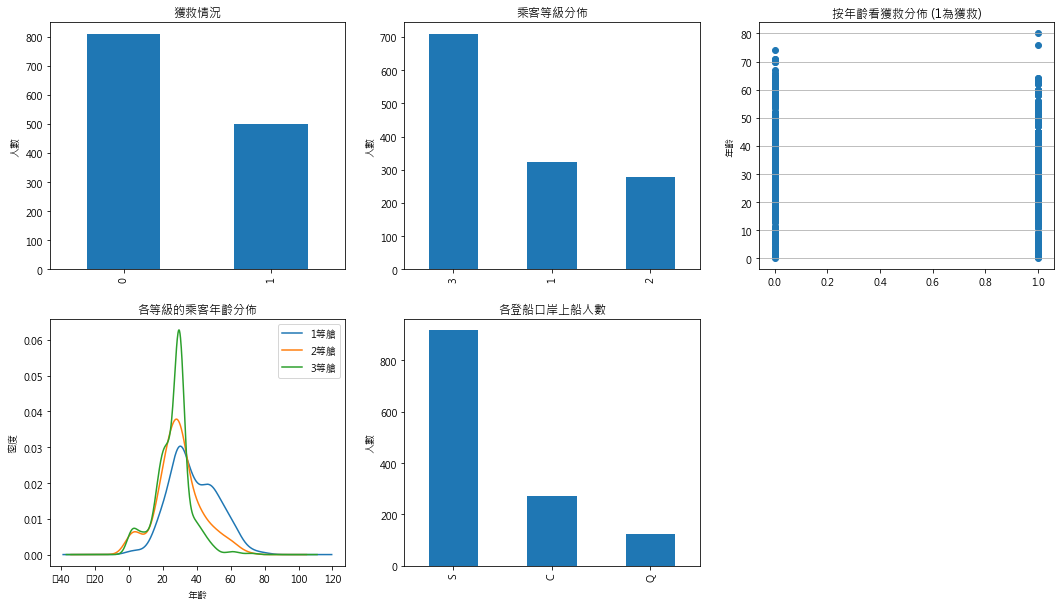

In [28]:
plt.subplot(2,3,5)
titanic.embarked.value_counts().plot(kind='bar')
plt.title("各登船口岸上船人數")
plt.ylabel("人數")
plt.show()

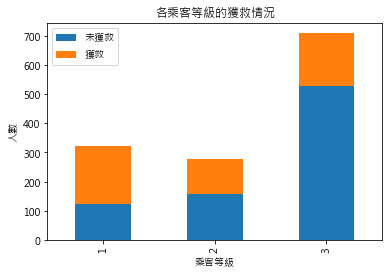

In [29]:
#各乘客等級的獲救情況
fig = plt.figure(figsize=(5,5))
#利用布爾過濾的方法，從乘客等級列表中抽出生還者和遇難者，再進行統計各等級乘客的生還者個數
Survived_0 = titanic.pclass[titanic.survived == 0].value_counts()
Survived_1 = titanic.pclass[titanic.survived == 1].value_counts()
df=pd.DataFrame({'獲救':Survived_1, '未獲救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title("各乘客等級的獲救情況")
plt.xlabel("乘客等級")
plt.ylabel("人數")
plt.show()

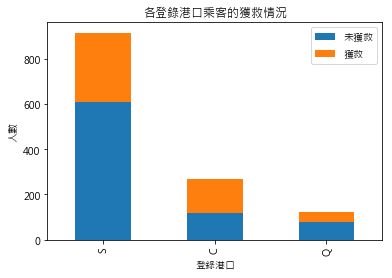

In [30]:
#各登錄港口的獲救情況
fig = plt.figure()

Survived_0 = titanic.embarked[titanic.survived == 0].value_counts()
Survived_1 = titanic.embarked[titanic.survived == 1].value_counts()
df=pd.DataFrame({u'獲救':Survived_1, u'未獲救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各登錄港口乘客的獲救情況")
plt.xlabel(u"登錄港口")
plt.ylabel(u"人數")
plt.show()

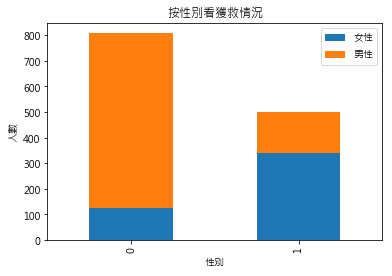

In [31]:
#看看各性別的獲救情況
fig = plt.figure()
fig.set(alpha=0.2) # 設定圖表顏色alpha參數

Survived_m = titanic.survived[titanic.sex == 'male'].value_counts()
Survived_f = titanic.survived[titanic.sex == 'female'].value_counts()
df=pd.DataFrame({u'男性':Survived_m, u'女性':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title(u"按性別看獲救情況")
plt.xlabel(u"性別")
plt.ylabel(u"人數")
plt.show()

## 機器學習(以決策樹為例)

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree

In [33]:
#只取需要的欄位做分析
X = titanic[['pclass', 'age', 'sex']]
y = titanic['survived']

In [34]:
X.head(10)

,pclass,age,sex
0,1,29.0000,female
1,1,0.9167,male
2,1,2.0000,female
3,1,30.0000,male
4,1,25.0000,female
5,1,48.0000,male
6,1,63.0000,female
7,1,39.0000,male
8,1,53.0000,female
9,1,71.0000,male


In [35]:
y.head(10)

0    1
1    1
2    0
3    0
4    0
5    1
6    1
7    0
8    1
9    0
Name: survived, dtype: int64

In [36]:
#分割測試及訓練資料
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

In [37]:
#特徵擷取
vec = DictVectorizer(sparse=False)

In [38]:
X_train = vec.fit_transform(X_train.to_dict(orient='record'))
X_test = vec.transform(X_test.to_dict(orient='record'))

In [39]:
#decision tree建立、訓練及預測
dtc = DecisionTreeClassifier(max_depth=2)
clf = dtc.fit(X_train, y_train)
y_predict = dtc.predict(X_test)

In [40]:
#顯示準確率
print(dtc.score(X_test, y_test))
print(classification_report(y_predict, y_test, target_names = ['died', 'survived']))

0.798780487805
             precision    recall  f1-score   support

       died       0.93      0.79      0.86       246
   survived       0.57      0.82      0.67        82

avg / total       0.84      0.80      0.81       328



In [41]:
#輸出.dot檔做視覺化
tree.export_graphviz(clf,out_file='tree.dot')

## 視覺化
- http://webgraphviz.com/

## Orange
- pip install orange3
- open Anaconda Navigator
- Launch Orange3

## 深度學習
- http://tensorflowkeras.blogspot.tw/2017/09/kerasdeep-learning_32.html